In [1]:
from glob import glob
from pathlib import Path

from become_yukarin.config.sr_config import SRDatasetConfig
from become_yukarin.config.sr_config import create_from_json as create_config
from become_yukarin.dataset.dataset import AcousticFeatureProcess
from become_yukarin.dataset.dataset import WaveFileLoadProcess
from become_yukarin.dataset.dataset import create_sr
from become_yukarin.param import Param
from become_yukarin import SuperResolution

import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

In [2]:
dataset_config = SRDatasetConfig(
    param=Param(),
    input_glob="/mnt/dwango/hiroshiba/become-yukarin/dataset/low-high-spectrogram/yukari-news/yukari-news-*.npy",
    num_test=5,
    seed=0,
    train_crop_size=512,
)
datasets = create_sr(dataset_config)
train = datasets['test']

In [3]:
model_path = Path('/mnt/dwango/hiroshiba/become-yukarin/sr1/predictor_5000.npz')
config_path = Path('/mnt/dwango/hiroshiba/become-yukarin/sr1/config.json')
config = create_config(config_path)
super_resolution = SuperResolution(config, model_path)

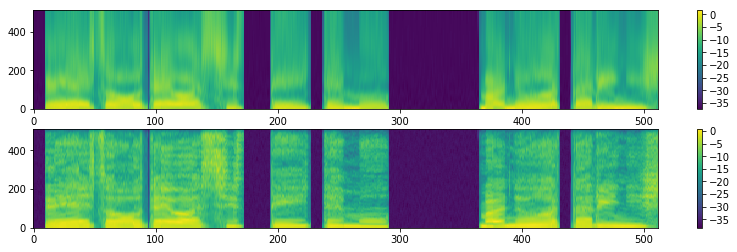

In [4]:
plt.figure(figsize=[14, 4])
data = train[0]

plt.subplot(2, 1, 1)
plt.imshow(data['input'][0].T, aspect='auto', origin='reverse')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.imshow(data['target'][0].T, aspect='auto', origin='reverse')
plt.colorbar()